# Lab 1 Report
Authors: Logan Aikas, Kevin I Alfaro, Nasser Alsubaie

In [2]:
#import cell

# Test the audio read and play functions
import simpleaudio as sa
from scipy.io import wavfile as wav
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
print("Hello Maxim")

Hello Maxim


In [4]:
wav_obj = sa.WaveObject.from_wave_file('train32.wav')
play_obj = wav_obj.play()
play_obj.wait_done()

### Discussion

This lab involves getting familiar with Python, Jupyter notebook, and the basics of working with audio signals in these environments.


## Assignment 1 -- Creating and Manipulating Arrays 

In [5]:
# Part A 

y1 = np.array([4, 6, 2])


# Part B

ca = y1[1]

cb = np.array([y1[1], y1[2]])

d = len(y1)

print(ca)
print(cb)
print(d)

# Part C

x1 = np.ones(5)*2

x2 = np.arange(-2,3,1)

print(x1)
print(x2)

#Part D

arrp = np.add(x1, x2)

arrc = np.concatenate((x1, x2), axis=None)

print(arrp)

print(arrc)


6
[6 2]
3
[2. 2. 2. 2. 2.]
[-2 -1  0  1  2]
[0. 1. 2. 3. 4.]
[ 2.  2.  2.  2.  2. -2. -1.  0.  1.  2.]


###  Discussion

Addition of two arrays creates a new array of identical length, where at each index of the new array, it takes on the value of the sum of the values present at the same index in the two arrays being added. For two arrays to be able to be added to each other, they need to have the same shape. For instance a 2D array with 3 rows of 3 columns can only be added to an array that is also 3 rows by 3 columns. 

Concatenation of two arrays appends the values of one array to the end of the other array. If concatenation is called with axis=None then both arrays are flattened to 1D despite whatever shape they had and in this case there are no constraints on what dimensions the original arrays were. If the axis is set to axis=0 then numpy is concatenating a new row. So for instance if you have a 2D array where each row is 3 columns long, and you have another 2D array and you want to concatenate it with axis = 0. The only way the array you want to concatenate can be valid is if the 2D array has rows that are also 3 columns long, but any number of rows are fine as long as the columns add match. Lastly, if the axis is set to axis = 1 this is appending a column to each row. So if you have a 2D array with 6 rows and you want to concatenate another 2D array then you must provide a 2D array that has 6 rows no more no less, the amount of columns per row however can vary. 

## Assignment 2 -- Amplitude Operations on Signals 

In [6]:
# Part A

t = np.arange(0, 3.5, 0.5)

x = 0.5*t

y = t**2

# Part B

z = x - 2*y

# Part C

w1 = z[4]

print(w1)

# Part D

w2 = z[0:4]

print(w2)


#Check All
print()
print("Checking all values \n")
print("x =", x, "\n")
print("y =", y, "\n")
print("z =", z, "\n")
print("w1 =", w1, "\n")
print("w2 =", w2,  "\n")


-7.0
[ 0.   -0.25 -1.5  -3.75]

Checking all values 

x = [0.   0.25 0.5  0.75 1.   1.25 1.5 ] 

y = [0.   0.25 1.   2.25 4.   6.25 9.  ] 

z = [  0.    -0.25  -1.5   -3.75  -7.   -11.25 -16.5 ] 

w1 = -7.0 

w2 = [ 0.   -0.25 -1.5  -3.75] 



### Discussion

Had we used fs = 1 rather than fs = 2 then we would have sampled half as often. The sample period would change from 0.5s to 1s. Our array t would only have 4 samples instead of 7, there can't be a half sample hence why it's not 3.5 samples. Specifically the t array would become:

[0. 1. 2. 3.] for fs = 1

The x array would similarly have only 4 values which would be:

[0. 0.5 1. 1.5] for fs = 1

The y array would have only 4 values and become:

[0. 1. 4. 9.] for fs = 1

The z array would only have 4 values and become:

[0. -1.5 -7. -16.5] fs = 1

The w1 would actually cause an error because z only has indices 0-3

w1 = z[4]
IndexError: index 4 is out of bounds for axis 0 with size 4

The w2 array would actually just be a copy of the z array since it's indexing from 0-3 which are the indices of z. So w2 would be:

[0. -1.5 -7. -16.5] for fs = 1

To summarize, had we used fs = 1 instead of fs = 2 then we would have less sample points, which then leads to all functions based on sample points requiring less values. It's good to note however the new data is also still present in the old data. For instance below are the z arrays for fs = 1 and fs = 2 respectively:

[0. -0.25 -1.5 -3.75 -7. -11.25 -16.5 ] fs = 2

[0. -1.5 -7. -16.5] fs = 1

Note that for each array the values 0, -1.5, -7, and -16.5 are present. So really all that has happened by changing the sampling frequency is the amount of data points each function will have, but the data points will still be the same values when corresponding to the same times.

## Assignment 3: Working with Sound Files

In [7]:
# Part A

fs1, y1 = wav.read('train32.wav')

print("Train whistle has sampling frequency:", fs1, "Number of samples", len(y1), "type", y1.dtype, "and array shape", np.shape(y1))

#the shape is (50313,) which means there is only one channel with 50313 samples

fs2, y2 = wav.read('tuba11.wav')

print("Tuba has sampling frequency:", fs2, "Number of samples", len(y2), "type", y2.dtype, "and array shape", np.shape(y2))
#the shape is (109708, 2) so there is 2 channels each with 109708 samples


# Part B

# first play each audio file normally using simpleaudio 

wav_obj = sa.WaveObject.from_wave_file('train32.wav')
play_obj = wav_obj.play()
play_obj.wait_done()

wav_obj = sa.WaveObject.from_wave_file('tuba11.wav')
play_obj = wav_obj.play()
play_obj.wait_done()

#then create new audio files with the sampling frequencies swapped

#first create "TubaSwapped.wav" which has the sampling frequency of the train

outfile = 'TubaSwapped.wav'
wav.write(outfile, fs1, y2.astype('int16'))

#play TubaSwapped.wav using simple audio

wav_obj = sa.WaveObject.from_wave_file('TubaSwapped.wav')
play_obj = wav_obj.play()
play_obj.wait_done()


#then create "TrainSwapped.wav" which has the sampling frequency of the tuba

outfile2 = 'TrainSwapped.wav'
wav.write(outfile2, fs2, y1.astype('int16'))

#play TrainSwapped.wav using simple audio


wav_obj = sa.WaveObject.from_wave_file('TrainSwapped.wav')
play_obj = wav_obj.play()
play_obj.wait_done()

# Part C

#to figure out how long each file is take the samples in the file and divide by the sampling frequency

#for the train 
length_train = len(y1)/fs1

#for the tuba
length_tuba = len(y2)/fs2

print("The train is ", length_train, "s long and the tuba is", length_tuba, "s long")

#so the tuba is longer

#to get a section of the tuba that is as long as the train multiply the length of the train
#by the sample frequency of the 

#NOTE use int() to round the samples needed to a whole number

samples_of_tuba_needed = int(length_train*fs2)

print(samples_of_tuba_needed)

#index the data for the samples to match

print
print(np.shape(y2))

y3 = y2[0:samples_of_tuba_needed]



y4 = y3[:,0]+y1[0:samples_of_tuba_needed]

outfile3 = "y4.wav"
wav.write(outfile3, fs1, y4.astype('int16'))

wav_obj = sa.WaveObject.from_wave_file('y4.wav')
play_obj = wav_obj.play()
play_obj.wait_done()



# Part D

# create a 4-sec pause
pause = np.zeros(int(4*fs1)) 

y5 = np.concatenate([y1, pause, y2[:, 0]]) 
outfile4 = 'y5.wav'
wav.write(outfile4, fs1, y5.astype('int16')) 

wav_obj = sa.WaveObject.from_wave_file('y5.wav')
play_obj = wav_obj.play()
play_obj.wait_done()

Train whistle has sampling frequency: 32000 Number of samples 50313 type int16 and array shape (50313,)
Tuba has sampling frequency: 11025 Number of samples 109708 type int16 and array shape (109708, 2)
The train is  1.57228125 s long and the tuba is 9.950839002267573 s long
17334
(109708, 2)


### Discussion: 

Because different sampling frequencies are used this causes the pitch and speed of the audio to change. Because the tuba has a much higher sampling frequency than the train audio, applying the tuba sampling frequency to the train audio means more data points are sampled than previously, this causes the audio to become stretched out and lower pitched. Conversely with the lower sampling frequency of the train being applied to the tuba this means the tuba audio is sampled less frequently than originally which results in a sped up audio that is of higher pitch.

Because the train sound is mono and the tuba sound is stereo this impacts both parts C and D. For part C only one channel of the tuba could be added with the train sample of equal length. This is because numpy requires to arrays being added to be of the same shape. So essentially you choose one of the two channels to discard from the tuba audio when adding the two. I suppose alternatively you could create a 2D array with two copies of the train audio to make it stereo and then you wouldn't lose a channel from the tuba audio. For part D again the effect is the same, adding a mono and stereo signal requires you to lose one of the channels from the stereo audio to ensure numpy can add the two arrays. And again alternatively it could be possible to double up the mono audio into a stereo file and then you wouldn't lose any of the stereo channels.

## Assignment 4: Plotting Comparisons

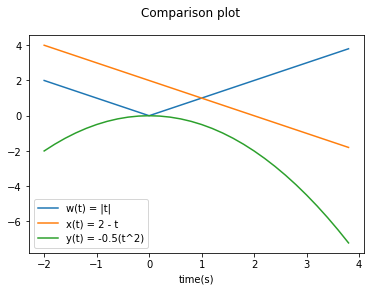

In [14]:
# Part A 
t = np.arange(-2,4, .2)
w = np.absolute(t)
x = 2 - t
y = -0.5*(t**2)


# Part B
fig1=plt.figure(1)

plt.plot(t, w, label='w(t) = |t|')
plt.plot(t,x,label='x(t) = 2 - t')
plt.plot(t,y,label='y(t) = -0.5(t^2)')
plt.xlabel('time(s)')
plt.suptitle("Comparison plot")
plt.legend()
plt.show()


### Discussion

To add varied line types to help someone who is colorblind all that you need to do is add the third parameter to the 'plt.plot' commands. The first two arguments are the independent and dependent variables respectively. The optional third argument specifies the line type used.

Some examples of how this could be done for w(t) above are:

plt.plot(t, w, '-',label='w(t) = |t|') which plots w(t) as a solid line

plt.plot(t, w, '--',label='w(t) = |t|') which plots w(t) as a dashed line

plt.plot(t,w, ':', label='w(t) = |t|') which plots w(t) as a dotted line



## Assignment 5: Plotting Sound Filesin Subplots

22554
(50313,)
(109708,)


(-40000.0, 40000.0)

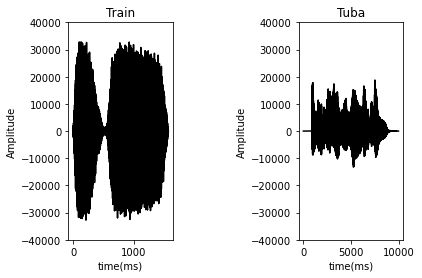

In [9]:
#Part A
fs1, y1 = wav.read('train32.wav')

fs2, y2 = wav.read('tuba11.wav')


#for the train 
length_train = len(y1)/fs1

#for the tuba
length_tuba = len(y2)/fs2

print(np.max(y2))

t1 = np.arange(0, len(y1), 1)
t1 = (t1/fs1)*1000
print(np.shape(t1))
t2 = np.arange(0, len(y2), 1)
t2 = (t2/fs2)*1000
print(np.shape(t2))

#Part B


fig2 = plt.figure(2)
fig2.subplots_adjust(hspace=0.5, wspace=1.2)

plt.subplot(1,2,1)
plt.plot(t1, y1, color='k')
plt.title("Train")
plt.ylabel('Amplitude')
plt.xlabel('time(ms)')
plt.ylim(-40000, 40000)


plt.subplot(1,2,2)
plt.plot(t2, y2[:, 0], color='k')
plt.title("Tuba")
plt.ylabel('Amplitude')
plt.xlabel('time(ms)')
plt.ylim(-40000, 40000)

### Discussion

You can see the amplitudes of the two different sounds have different ranges. The tuba looks to have a bound of slightly less than 20,000. Whereas the train is bound slighly above 30,000. You can't directly see the sampling rate of the tuba and train here. The reason is because the sampling frequency is samples per second. One way you could figure out what the sampling frequency is, would be to check the time between two samples and take the reciprocal of that. However being that the train has a sampling rate 32,000 samples per second and the tuba has 109,708 samples per second the graphs would need to be magnified in much more extreme to determine that. For instance take the train graph on the left. It goes from 0 to about 2000ms. Which is roughly 2 seconds (slightly less in reality but for illustration) that means on the train graph there is about 64,000 samples so to test the sampling period to determine sample rate you would need to magnify really far in. So yes technically with this data you can determine the sampling rate, but we would need to use more advanced magnification, but with the current plots as is no you cannot determine sampling rate.